In [1]:
# The following code includes Bagging of logistic models
# best parameters are identified using grid search with cross validation

In [1]:
import os
os.chdir("C:\Digital Nest\Decision Trees")
print (os.getcwd())

C:\Digital Nest\Decision Trees


In [2]:
import numpy as np
import pandas as pd
churn = pd.read_csv('Churn.csv')
churn.describe()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [11]:
churn.shape

(3333, 21)

In [3]:
# target class ratio
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [4]:
2850/(2850+483)

0.8550855085508551

In [5]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [4]:
# check if any NA values
churn.isnull().values.any()

False

In [7]:
# find out corrleation between day charge and day minutes
np.corrcoef(churn.DayMins,churn.DayCharge)

array([[1.        , 0.99999995],
       [0.99999995, 1.        ]])

In [8]:
np.corrcoef(churn.EveMins,churn.EveCharge)

array([[1.        , 0.99999978],
       [0.99999978, 1.        ]])

In [9]:
np.corrcoef(churn.NightMins,churn.NightCharge)

array([[1.        , 0.99999921],
       [0.99999921, 1.        ]])

In [10]:
np.corrcoef(churn.IntlMins,churn.IntlCharge)

array([[1.        , 0.99999274],
       [0.99999274, 1.        ]])

In [11]:
np.corrcoef(churn.DayCalls,churn.DayCharge)

array([[1.        , 0.00675296],
       [0.00675296, 1.        ]])

In [4]:
# split the file into Independent and dependent variables
churnY = churn.iloc[::,7:8:1]
print(churnY.describe())
churnX = churn
churnX.drop(columns=['Churn','Phone'],axis=1,inplace=True)
print(churnX.shape)

             Churn
count  3333.000000
mean      0.144914
std       0.352067
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
(3333, 19)


In [5]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, test_size = 0.30, 
                                                    random_state = 1)
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
#print(X_train[0:5])
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2333, 1)
(1000, 19)
(1000, 1)


In [19]:
np.unique(churn.AreaCode,return_counts=True)

(array([408, 415, 510], dtype=int64), array([ 838, 1655,  840], dtype=int64))

In [20]:
np.unique(churn.State,return_counts=True)

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([ 52,  80,  55,  64,  34,  66,  74,  54,  61,  63,  54,  53,  44,
         73,  58,  71,  70,  59,  51,  65,  70,  62,  73,  84,  63,  65,
         68,  68,  62,  61,  56,  68,  62,  66,  83,  78,  61,  78,  45,
         65,  60,  60,  53,  72,  72,  77,  73,  66,  78, 106,  77],
       dtype=int64))

In [6]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
X_test.State = le.transform(X_test.State)
print(X_train.State.describe())

count    2333.000000
mean       26.096871
std        14.956112
min         0.000000
25%        14.000000
50%        26.000000
75%        39.000000
max        50.000000
Name: State, dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
#dir(LabelEncoder)

In [22]:
np.unique(X_train.State,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([39, 59, 42, 42, 23, 49, 51, 40, 40, 41, 43, 30, 30, 54, 41, 51, 45,
        36, 33, 48, 50, 43, 52, 62, 46, 47, 50, 47, 47, 38, 36, 46, 36, 45,
        58, 56, 38, 51, 34, 43, 39, 47, 37, 51, 52, 53, 53, 51, 49, 78, 61],
       dtype=int64))

In [23]:
X_train.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 'State', 'AreaCode'], dtype=object)

In [24]:
X_train.shape

(2333, 19)

In [7]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
categories = np.array([17,18])                 # column 17 - state, 18 - area code
OHE = OneHotEncoder(n_values = 'auto', categorical_features = categories, 
                    sparse = False, handle_unknown = 'error')
X_train = OHE.fit_transform(X_train)
print(X_train.shape)
X_test = OHE.transform(X_test)
print(X_test.shape)

(2333, 71)
(1000, 71)


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [28]:
type(X_train)

numpy.ndarray

In [7]:
%%time
# Bagging Classifier on logistic
# build the logistic object
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(class_weight = 'balanced',solver='lbfgs',penalty='l2',C=0.5)
# build grid search parameters
parms = {'n_estimators' : [50,100],
          'bootstrap':[True,False],
          'max_samples':[0.8,0.7]} 
# perform grid search
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(base_estimator = lgr, max_features = 1.0,
                           verbose = 10, oob_score = False)
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = Bagging,param_grid = parms, scoring = 'roc_auc',cv=3, refit=True,
                           return_train_score = True, verbose=10,n_jobs=1)
CV.fit(X_train,Y_train.Churn)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=10 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=10, score=0.8994810033934394, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=10 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=10, score=0.8725264488655267, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=10 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=10, score=0.8822435553168637, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=8 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=8, score=0.8994810033934394, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=8 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=2, min_samples_split=8, score=0.8725264488

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  min_impurity_decrease=0.005, min_samples_leaf=3, min_samples_split=8, score=0.8822435553168637, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=3, min_samples_split=5 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=3, min_samples_split=5, score=0.8994810033934394, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=3, min_samples_split=5 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=3, min_samples_split=5, score=0.8725264488655267, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=3, min_samples_split=5 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=3, min_samples_split=5, score=0.8822435553168637, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=5, min_samples_split=10 
[CV]  min_impurity_decrease=0.005, min_samples_leaf=5, min_samples_split=10, score=0.8994810033934394, total=   0.0s
[CV] min_impurity_decrease=0.005, min_samples_leaf=5, min_samples_split=10 
[CV]  min_impurity_decrease=0.005, min_sam

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'min_samples_split': [10, 8, 5], 'min_samples_leaf': [2, 3, 5], 'min_impurity_decrease': [0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=10)

In [27]:
%%time
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_Bagging_Logistic.xlsx')

Wall time: 657 ms


In [28]:
print(CV.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.005, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [31]:
print(CV.best_score_)
print(CV.best_params_)

0.884751410346626
{'min_impurity_decrease': 0.005, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [9]:
# Preidct on Test data and check the confusion matrix
predictTest = CV.predict(X_test)
print(predictTest[0:10])

[0 0 0 0 0 0 0 0 1 0]


In [10]:
predictProb = CV.predict_proba(X_test)
print(predictProb[0:10])
PProb = pd.DataFrame(predictProb)

[[0.86817471 0.13182529]
 [0.86817471 0.13182529]
 [1.         0.        ]
 [0.86817471 0.13182529]
 [0.86817471 0.13182529]
 [0.89150533 0.10849467]
 [0.82382239 0.17617761]
 [0.86817471 0.13182529]
 [0.18647605 0.81352395]
 [0.86817471 0.13182529]]


In [11]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[804  51]
 [ 34 111]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       855
           1       0.69      0.77      0.72       145

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.82      0.85      0.84      1000
weighted avg       0.92      0.92      0.92      1000



In [12]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb[1])
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(Y_test, PProb[1])

0.8772817100221818


In [35]:
print(THR)
print(TPR)
print(FPR)

[2.         1.         0.94340551 0.92756328 0.8705117  0.8615592
 0.40167702 0.15259441 0.14081428 0.11132266 0.05397334]
[0.         0.2173913  0.44202899 0.73913043 0.74637681 0.8115942
 0.83333333 0.83333333 0.98550725 0.98550725 1.        ]
[0.         0.00348028 0.02436195 0.05568445 0.06148492 0.07308585
 0.13341067 0.14965197 0.89443155 0.95011601 1.        ]


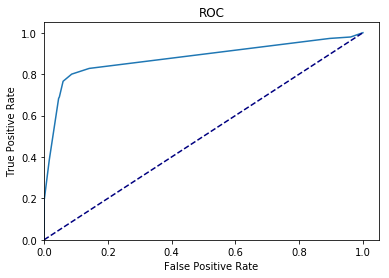

In [14]:
import matplotlib.pyplot as plt
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()